# Módulo 6: Aprendizaje de máquina supervisado
## Tarea 1
    Participante: Ángel Andrés Moreno Sánchez
    
### Objetivo: 
Hacer un modelo de regresión que prediga cuánto se le debe cobrar a un 
paciente por una aseguradora dado su historial clínico básico e información demográfica


In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [2]:
# Importar los datos
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Pregunta 1: 
¿Existen valores nulos en alguna columna? 

In [3]:
df.info()    # Información acerca de las variables del DF

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.isnull().sum()    # Contamos el número de valores nulos en alguna columna

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**R:** No existen valores nulos en las columnas

### Pregunta 2:
Graficar la distribución de la columna “charges”

In [5]:
df['charges'].describe() 

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

<AxesSubplot:>

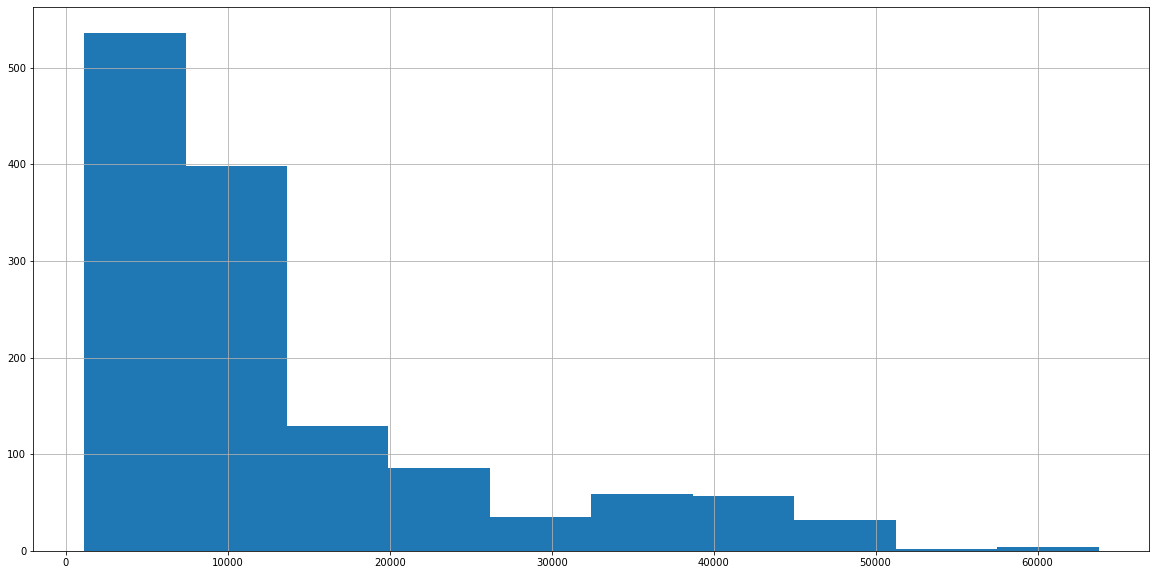

In [6]:
df['charges'].hist()    # Obtener el histograma del dataframe, variable charges

### Pregunta 3: 
Graficar la distribución conjunta de “charges” y “age” para los no fumadores

In [7]:
# Agrupamos en fumadores y no fumadores

smoke = [x for x in df.groupby('smoker')][0][1]    
no_smoke = [x for x in df.groupby('smoker')][1][1]

In [8]:
smoke.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


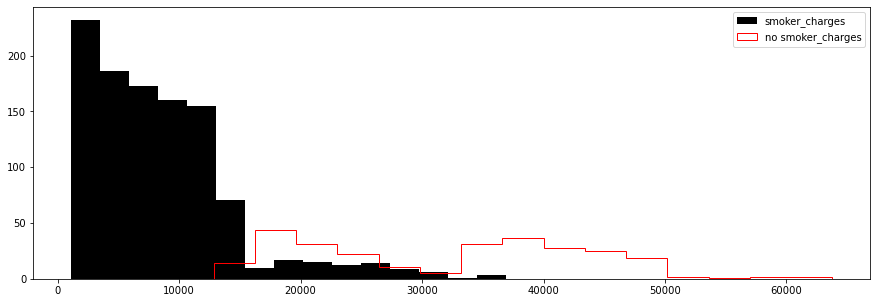

In [9]:
# Obtenemos las distribuciones conjuntas 
plt.rcParams['figure.figsize'] = (15, 5)

# Para la variable charges
plt.hist(smoke['charges'],label='smoker_charges',color='black',bins=15)
plt.hist(no_smoke['charges'],label='no smoker_charges',color='red',bins=15,histtype='step')

plt.legend()
plt.show()

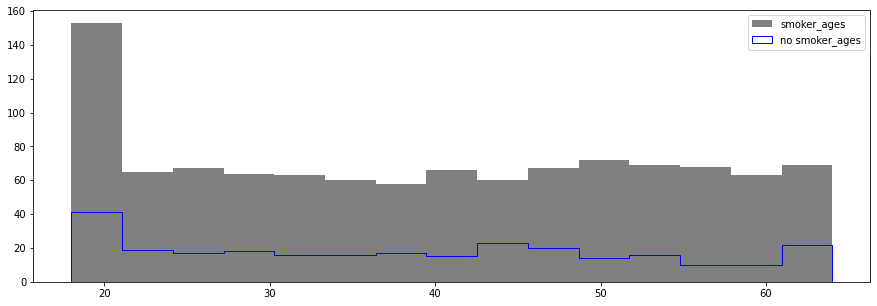

In [10]:
# Obtenemos las distribuciones conjuntas 
plt.rcParams['figure.figsize'] = (15, 5)

# Para la variable ages
plt.hist(smoke['age'],label='smoker_ages',color='grey',bins=15)
plt.hist(no_smoke['age'],label='no smoker_ages',color='blue',bins=15,histtype='step')

plt.legend()
plt.show()

### Pregunta 4: 
Graficar la matriz de correlación entre las variables incluyendo la variable “charges”


In [11]:
# Primero debemos realizar la transformación de variables categoricas a numéricas 

df_cat = pd.get_dummies(df, columns=['region'])
df_cat['sex'] = df_cat['sex'].astype('category')
df_cat['sex'] = df_cat['sex'].cat.codes
df_cat['smoker'] = df_cat['smoker'].astype('category')
df_cat['smoker'] = df_cat['smoker'].cat.codes
df_cat.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [12]:
# Importar seaborn
import seaborn as sns 

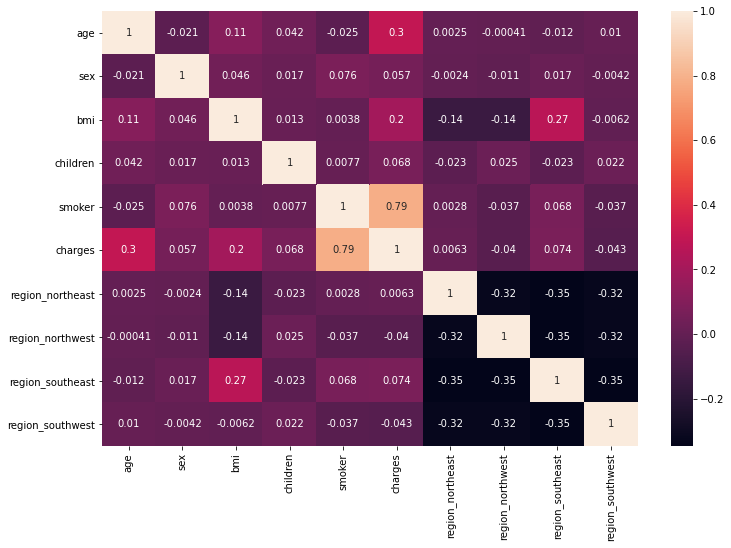

In [13]:
corr_df = df_cat.corr(method='pearson')

plt.figure(figsize=(12, 8))
sns.heatmap(corr_df, annot=True)
plt.show()

### Pregunta 5: 
Ajustar los siguientes modelos de regresión y encontrar las métricas de $R^2$ para cada uno 
de ellos (se debe predecir la variable “charges”).
      
    a. Linear Regression
    b. Ridge Regression
    c. Lasso Regression
    d. KNN regression

Primero realizaremos el ajuste a los modelos de regresión con todas las variables del dataset y posteriormente se realizará una elección de variables por medio de los resulatados de la matriz de correlación.

### Todas las variables

In [14]:
# Importar librerías de sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Definir X e y
X = df_cat.drop(columns='charges', axis=1)
y = df_cat['charges']

In [15]:
X.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0


In [16]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

### Variables seleccionadas por la matriz de correlación

In [17]:
# Tomamos solamente las variables con una correlación mayor a 0.1
df_cat_corr = df_cat.drop(columns = ['sex','children','region_northeast','region_northwest',
                                     'region_southeast','region_southwest'],axis=1)

In [18]:
# Definir X e y
X_ = df_cat_corr.drop(columns='charges', axis=1)
y_ = df_cat_corr['charges']

In [19]:
X_.head()

,age,bmi,smoker
0,19,27.900,1
1,18,33.770,0
2,28,33.000,0
3,33,22.705,0
4,32,28.880,0


In [20]:
y_.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

#### Definición Datasets

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)    # Sets de entrenamiento Completo
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_,y_, random_state=42)    # Sets de entrenamiento Selecto

## Estandarización de datos

In [22]:
# stand_cols= ["age", "bmi"]
stand_cols = X.columns
stand_cols_ = X_.columns

# Estandarizar los datos:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler().fit(X_train.loc[:, stand_cols])

X_train.loc[:, stand_cols]= scaler.transform(X_train.loc[:, stand_cols])
X_test.loc[:, stand_cols]= scaler.transform(X_test.loc[:, stand_cols])

scaler_= StandardScaler().fit(X_train_.loc[:, stand_cols_])
X_train_.loc[:, stand_cols_]= scaler_.transform(X_train_.loc[:, stand_cols_])
X_test_.loc[:, stand_cols_]= scaler_.transform(X_test_.loc[:, stand_cols_])

## Ajuste de modelos

In [23]:
# Función para obtener los score y métricas de los distintos modelos de regresión
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
def regression_predict(data,
                       X_train,X_test,y_train,y_test,
                      reg_type):
    # Selección HyperP
    if reg_type == 'Ridge':
        selection = int(input('Ridge: Alpha?'))
        alfa_r = selection if selection != 0 else 2

    elif reg_type == 'Lasso':
        selection = input('Lasso: Alpha?')
        alfa_l = selection if selection != 0 else 0.001
    elif reg_type == 'KNN':
        selection = int(input('KNN: n Vecinos?'))
        n_neigh = selection if selection != 0 else 4
        
    # Definir diccionario de modelos
    alphas = 10.**np.arange(-2,3)    #Rango de alfa para RidgeCV
    alfa_r = 2
    alfa_l = 0.001
    n_neigh = 5
    regressions = {'Linear': LinearRegression(),
                   'Ridge': Ridge(alpha=alfa_r, normalize=True),
                   'RidgeCV': RidgeCV(alphas=alphas, normalize=True, scoring='r2'),
                   'Lasso': Lasso(alpha=alfa_l, normalize=True) ,
                   'KNN': KNeighborsRegressor(n_neighbors=n_neigh)}
    # Ajustar y obtener la predicción 
    model = regressions[reg_type]
    model.fit(X_train,y_train)    # Ajuste
    y_pred_train = model.predict(X_train)   # Pred-Entrenamiento
    y_pred = model.predict(X_test)   # Pred-Validación
    if reg_type == 'RidgeCV':
        print('RidgeCV: Alfa adecuada \n')
        print(model.alpha_)
    elif reg_type == 'Lasso':
        print('Lasso: Coeficientes')
        print(model.coef_)
    
    print(data+' '+reg_type+' Model Resultados --------'+'\n')
    # Verificar sub/sobre ajuste
    print('¿Sobre/sub ajuste?')
    print(f'Train score: {model.score(X_train,y_train)}')
    print(f'Test score: {model.score(X_test,y_test)}'+'\n'+'\n')

    # Calcular el score R^2
    model_score = r2_score(y_test,y_pred)
    print("R-Square Value",r2_score(y_test,y_pred))
    print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
    print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
    print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    return model_score

### Linear Regression

In [24]:
# Importar librerías de sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model = 'Linear'

In [25]:
linear_score = regression_predict('Complete Data',X_train,X_test,y_train,y_test, model)

Complete Data Linear Model Resultados --------

¿Sobre/sub ajuste?
Train score: 0.7449392471166407
Test score: 0.7670199812349241


R-Square Value 0.7670199812349241
mean_absolute_error : 4246.145686975891
mean_squared_error :  35154620.559853144
root_mean_squared_error :  5929.133204765529


In [26]:
linear_score_ = regression_predict('Selected Data',X_train_,X_test_,y_train_,y_test_, model)

Selected Data Linear Model Resultados --------

¿Sobre/sub ajuste?
Train score: 0.7422732113805752
Test score: 0.7622843807642006


R-Square Value 0.7622843807642006
mean_absolute_error : 4301.327214279142
mean_squared_error :  35869180.71206611
root_mean_squared_error :  5989.088470883204


### Ridge Regression

In [27]:
from sklearn.linear_model import Ridge
model = 'Ridge'

In [28]:
ridge_score = regression_predict('Complete Data',X_train,X_test,y_train,y_test, model)
print('\n \n')
ridge_score_ = regression_predict('Selected Data',X_train_,X_test_,y_train_,y_test_, model)

Ridge: Alpha?2
Complete Data Ridge Model Resultados --------

¿Sobre/sub ajuste?
Train score: 0.41341843415465607
Test score: 0.42067620671072636


R-Square Value 0.42067620671072636
mean_absolute_error : 6955.750230643567
mean_squared_error :  87414827.4273901
root_mean_squared_error :  9349.589692996698

 

Ridge: Alpha?2
Selected Data Ridge Model Resultados --------

¿Sobre/sub ajuste?
Train score: 0.41030661681932223
Test score: 0.41677379047815477


R-Square Value 0.41677379047815477
mean_absolute_error : 6973.150413627455
mean_squared_error :  88003667.46032442
root_mean_squared_error :  9381.026993902342


### Ridge CV

In [29]:
from sklearn.linear_model import RidgeCV
model = 'RidgeCV'

In [30]:
ridgecv_score = regression_predict('Complete Data',X_train,X_test,y_train,y_test, model)
print('\n \n')
ridgecv_score_ = regression_predict('Selected Data',X_train_,X_test_,y_train_,y_test_, model)

RidgeCV: Alfa adecuada 

0.01
Complete Data RidgeCV Model Resultados --------

¿Sobre/sub ajuste?
Train score: 0.7448806091188018
Test score: 0.76683724539178


R-Square Value 0.76683724539178
mean_absolute_error : 4259.096794293714
mean_squared_error :  35182193.77949004
root_mean_squared_error :  5931.457980925941

 

RidgeCV: Alfa adecuada 

0.01
Selected Data RidgeCV Model Resultados --------

¿Sobre/sub ajuste?
Train score: 0.7421988158489006
Test score: 0.7619944106890545


R-Square Value 0.7619944106890545
mean_absolute_error : 4315.854578488647
mean_squared_error :  35912934.62718511
root_mean_squared_error :  5992.740160159216


### Lasso Regression

In [31]:
from sklearn.linear_model import Lasso
model = 'Lasso'

In [32]:
lasso_score = regression_predict('Complete Data',X_train,X_test,y_train,y_test, model)
print('\n \n')
lasso_score_ = regression_predict('Selected Data',X_train_,X_test_,y_train_,y_test_, model)

Lasso: Alpha?0.001
Lasso: Coeficientes
[3643.04013329   22.78288168 2042.22154461  513.49036105 9546.22029749
  325.07465523  170.08980312  -13.45976961  -47.24831825]
Complete Data Lasso Model Resultados --------

¿Sobre/sub ajuste?
Train score: 0.7449555327652855
Test score: 0.7672640315451156


R-Square Value 0.7672640315451156
mean_absolute_error : 4243.653599362271
mean_squared_error :  35117795.5304031
root_mean_squared_error :  5926.026959979435

 

Lasso: Alpha?0.001
Lasso: Coeficientes
[3678.41571112 1963.62543196 9561.61019378]
Selected Data Lasso Model Resultados --------

¿Sobre/sub ajuste?
Train score: 0.7422732113606871
Test score: 0.7622843795165404


R-Square Value 0.7622843795165404
mean_absolute_error : 4301.324211383094
mean_squared_error :  35869180.90032696
root_mean_squared_error :  5989.088486600191


### KNN Regression

In [33]:
from sklearn.neighbors import KNeighborsRegressor
model = 'KNN'

In [34]:
knn_score = regression_predict('Complete Data',X_train,X_test,y_train,y_test, model)
print('\n \n')
knn_score_ = regression_predict('Selected Data',X_train_,X_test_,y_train_,y_test_, model)

KNN: n Vecinos?5
Complete Data KNN Model Resultados --------

¿Sobre/sub ajuste?
Train score: 0.8582803964823551
Test score: 0.7975685156773892


R-Square Value 0.7975685156773892
mean_absolute_error : 3485.4959269641786
mean_squared_error :  30545117.381525457
root_mean_squared_error :  5526.763734910825

 

KNN: n Vecinos?5
Selected Data KNN Model Resultados --------

¿Sobre/sub ajuste?
Train score: 0.8754409053087155
Test score: 0.8422277958447706


R-Square Value 0.8422277958447706
mean_absolute_error : 2760.2704911492538
mean_squared_error :  23806427.698683817
root_mean_squared_error :  4879.183097474804


### Pregunta 6: 
¿Cuáles son las mejores variables para la predicción de “charges”?

**R:** Tras comparar el ajuste de los modelos con todas las variables y con una selección de variables de acuerdo a la correlación con la variable  `charges` podemos obtener un score para cada caso. A continuación se muestra una tabla comparando el score entre ambos acercamientos.

In [35]:
complete_scores = [linear_score,ridge_score,ridgecv_score,lasso_score,knn_score]
selected_scores = [linear_score_,ridge_score_,ridgecv_score_,lasso_score_,knn_score_]
df = pd.DataFrame({'Modelo':['Lineal','Ridge','RidgeCV','Lasso','KNN'],
                   'Score Completo': complete_scores,
                  'Score Selecto': selected_scores,
                  'Score Abs Diff [%]': 100*abs(np.array(complete_scores)-np.array(selected_scores)),
                  'Score Diff Squared [%]': 100*(np.array(complete_scores)-np.array(selected_scores))**2})

In [36]:
df

,Modelo,Score Completo,Score Selecto,Score Abs Diff [%],Score Diff Squared [%]
0,Lineal,0.767020,0.762284,0.473560,0.002243
1,Ridge,0.420676,0.416774,0.390242,0.001523
2,RidgeCV,0.766837,0.761994,0.484283,0.002345
3,Lasso,0.767264,0.762284,0.497965,0.002480
4,KNN,0.797569,0.842228,4.465928,0.199445


Podemos notar que, aunque a primera instancia pareciera que elegir menos variables de acuerdo a la matriz de correlación mejoraría el score del modelo, esta selección no tiene un gran impacto de acuerdo a la diferencia absoluta y cuadrada entre ambos casos para todos los modelos, salvo la regresión por vecinos cercanos. Por lo tanto, las variables `age`, `bmi` y `smoker` son las mejores para el modelo KNN Regression.

### Pregunta 7:
Discuta cuál modelo entrega mejor predictibilidad y por qué

De acuerdo a la tabla de scores anterior, notamos que el mejor modelo es el KNNRegressor utilizando solo las variables `age`, `bmi` y `smoker`. Bastaría realizar una selección de hiperparámetros 

In [37]:
def regression_scores(data,
                       X_train,X_test,y_train,y_test,
                      reg_type,**kwargs):
    # Selección de HiperP
    HPar = {'alfa_r': 2,'alfa_l': 0.001,'k_neigh': 5}
    for key,value in kwargs.items():
        HPar[key] = value
    # Definir diccionario de modelos
    alphas = 10.**np.arange(-2,3)    #Rango de alfa para RidgeCV
    regressions = {'Linear': LinearRegression(),
                   'Ridge': Ridge(alpha=HPar['alfa_r'], normalize=True),
                   'RidgeCV': RidgeCV(alphas=alphas, normalize=True, scoring='r2'),
                   'Lasso': Lasso(alpha=HPar['alfa_l'], normalize=True) ,
                   'KNN': KNeighborsRegressor(n_neighbors=HPar['n_neigh'])}
    # Ajustar y obtener la predicción 
    model = regressions[reg_type]
    model.fit(X_train,y_train)    # Ajuste
    y_pred_train = model.predict(X_train)   # Pred-Entrenamiento
    y_pred = model.predict(X_test)   # Pred-Validación
    if reg_type == 'RidgeCV':
        print('RidgeCV: Alfa adecuada \n')
        print(model.alpha_)
    elif reg_type == 'Lasso':
        print('Lasso: Coeficientes')
        print(model.coef_)
    
    print(data+' '+reg_type+' Model Resultados --------'+'\n')
    # Verificar sub/sobre ajuste
    print('¿Sobre/sub ajuste?')
    print(f'Train score: {model.score(X_train,y_train)}')
    print(f'Test score: {model.score(X_test,y_test)}'+'\n'+'\n')

    # Calcular el score R^2
    model_score = r2_score(y_test,y_pred)
    print("R-Square Value",r2_score(y_test,y_pred))
#     print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
#     print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
#     print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    return np.array([model.score(X_train,y_train), model.score(X_test,y_test)])

In [38]:
n_vecinos = np.arange(5,16)
kvecinos_scores = []
for k in n_vecinos:
    s = regression_scores(f'Selected {k}-vecinos',X_train_,X_test_,y_train_,y_test_,'KNN',n_neigh=k)
    kvecinos_scores.append(s)
kvecinos_scores = np.array(kvecinos_scores)

Selected 5-vecinos KNN Model Resultados --------

¿Sobre/sub ajuste?
Train score: 0.8754409053087155
Test score: 0.8422277958447706


R-Square Value 0.8422277958447706
Selected 6-vecinos KNN Model Resultados --------

¿Sobre/sub ajuste?
Train score: 0.8731284336119343
Test score: 0.8467227674855436


R-Square Value 0.8467227674855436
Selected 7-vecinos KNN Model Resultados --------

¿Sobre/sub ajuste?
Train score: 0.8715873008408817
Test score: 0.8505504039200776


R-Square Value 0.8505504039200776
Selected 8-vecinos KNN Model Resultados --------

¿Sobre/sub ajuste?
Train score: 0.8681839696761002
Test score: 0.8550020803586365


R-Square Value 0.8550020803586365
Selected 9-vecinos KNN Model Resultados --------

¿Sobre/sub ajuste?
Train score: 0.8663529488138941
Test score: 0.8595001396796969


R-Square Value 0.859500139679697
Selected 10-vecinos KNN Model Resultados --------

¿Sobre/sub ajuste?
Train score: 0.8642809840652672
Test score: 0.8597578072828286


R-Square Value 0.859757807

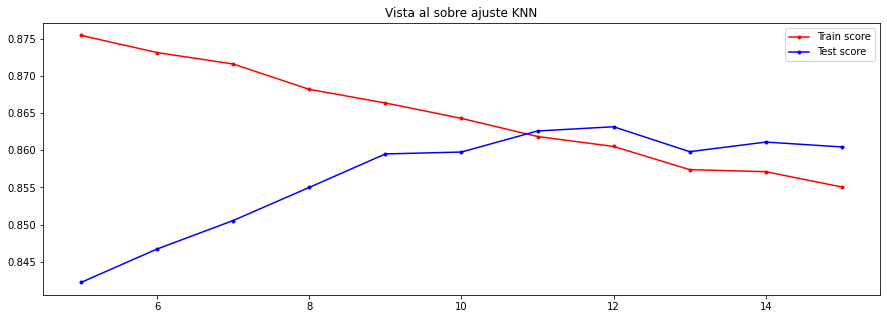

In [39]:
plt.plot(n_vecinos,kvecinos_scores[:,0],'.-',label='Train score',c='red')
plt.plot(n_vecinos,kvecinos_scores[:,1],'.-',label='Test score',c='blue')
plt.legend()
plt.title('Vista al sobre ajuste KNN')
plt.show()

In [40]:
# Generar modelo elegido
final_model = KNeighborsRegressor(n_neighbors=12)
final_model.fit(X_train_,y_train_)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                    weights='uniform')

**R:** De la gráfica anterior, decidimos que el mejor modelo es un KNN-Regressor con 11 vecinos ya que es el modelo que ofrece un mayor score (coeficiente $R^2$) con un buen balance entre sesgo y varianza. Sabemos que el modelo no se encuentra sub ni sobreajustado debido a que los score en entrenamiento y prueba son similares. Se trata de un modelo aceptable con un score de 0.86 que si bien no podría ofrecer una solución completamente formidable al problema puede ser un muy buen baseline para contrastar con otros modelos más robustos como RandomForest. 

### Pregunta 8:
Haga un resumen ejecutivo de los resultados del modelo para presentar a una
audiencia de negocio 

Text(0.5, 1.0, 'Gráfico 1')

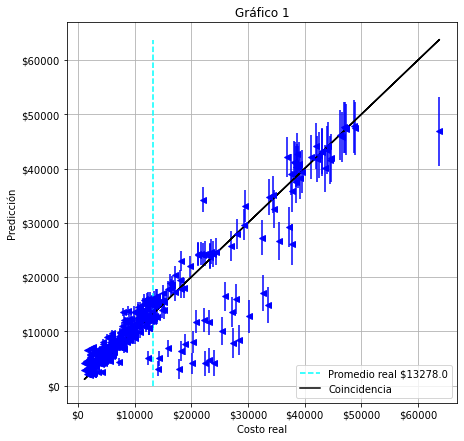

In [41]:
y_predict = final_model.predict(X_test_)
error = 0.1*y_test_.mean()

e_bar = y_test_*0.1

plt.rcParams['figure.figsize'] = (7.0, 7.0)
fig,ax = plt.subplots()
ax.plot([y_test_.mean(),y_test_.mean()],[0,y_test_.max()],
         '--',c='cyan',label=f'Promedio real ${np.round(y_test_.mean())}')
ax.errorbar(y_test_,y_predict,yerr=e_bar,fmt='<',c='blue')
ax.plot(y_test_,y_test_,c='black',label='Coincidencia')
ax.set_ylabel('Predicción')
ax.set_xlabel('Costo real')
ax.yaxis.set_major_formatter('${x:1.0f}')
ax.xaxis.set_major_formatter('${x:1.0f}')
ax.grid()
ax.legend()
ax.set_title('Gráfico 1')

In [43]:
result = pd.DataFrame({'Predict':y_predict,'Real':y_test_ })
result.head()

,Predict,Real
764,8451.109217,9095.06825
887,7073.634229,5272.17580
890,29673.456858,29330.98315
1293,10067.783177,9301.89355
259,34724.013357,33750.29180


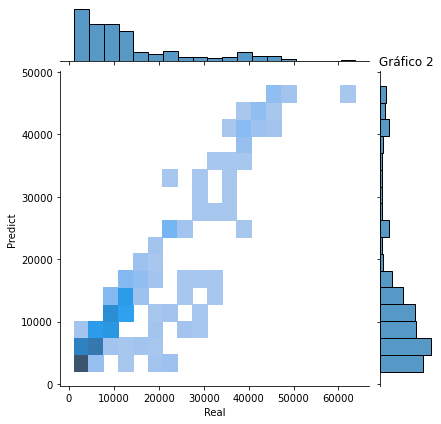

In [44]:
sns.jointplot(data=result, x='Real',y='Predict',
              kind='hist')
plt.title('Gráfico 2')
plt.show()

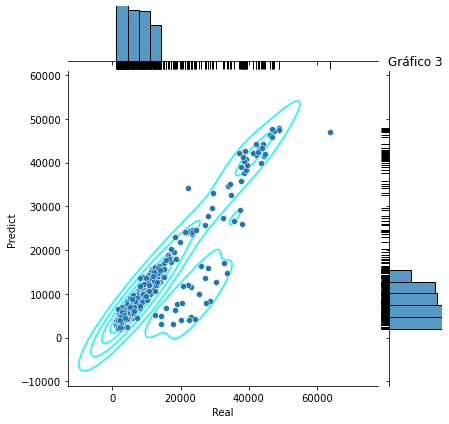

In [45]:
g = sns.jointplot(data=result, x='Real',y='Predict')
g.plot_joint(sns.kdeplot, color="cyan", zorder=0, levels=6)
g.plot_marginals(sns.rugplot, color="black", height=-.15, clip_on=False)
plt.title('Gráfico 3')
plt.show()

**R:** A lo largo de los 3 gráficos mostrados se contrasta el desempeño de predicción de costo del modelo elegido contra los costos reales. Pongamos atención al gráfico 1, aquí podemos ver una primera aproximación sobre la predicción de precios, todos los puntos rojos que se encuentren por encima de la línea naranja serán aquellos casos en los que el modelo predijo un costo mayor al real, mientras que los que estén por debajo serán predicciones por debajo del precio real. En este gráfico, un modelo ideal contaría con todos los puntos rojos dibujados a lo largo de la línea negra. Además, las barras azules muestran un intervalo de error para la predicción del modelo sobre el 10% del valor real, es decir, si alguna línea azul sobre el triángulo toca a la línea negra, el modelo habrá acertado en el precio real con un error menor al 10%. Inspeccionando el gráfico 1, notamos que la predicción del modelo es más certera para precios menores a \\$ 13,300 y para precios entre \\$40,000 y \\$50,000 ya que en estos intervalos las predicciones son muy cercanas a la real. 

Ahora, mirando los gráficos 2 y 3 notamos como las distribuciones (mostradas sobre los ejes)  de los costos reales y predichas son similares, es decir la forma de la distribución de costos se mantiene para los costos predichos. Adicionalmente, podemos apreciar el conjunto de predicciones que se encuentran alejadas del precio real,  primero como un mapa de calor y en el segundo como una agrupación de puntos. Esta observación es importante ya que dichas predicciones menores al precio real podrían significar pérdidas para el negocio ya que podrían estimarse precios menores a los que se tendrían que pagar. Sin embargo, el modelo predice con muy buenos resultados el precio para los precios más frecuentes dentro del negocio y para segmentos de costos altos. 